# Projeto Machine Learning

Objetivo: Criar um modelo utilizando Arvóre de Descisão para prever os passageiros sobreviventes do Titanic.

<img src="https://istoe.com.br/wp-content/uploads/sites/14/2020/10/68.jpg">

## Importando as Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

## Carregando os Dados

In [2]:
df = pd.read_csv("./dados/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Criando um Baseline

Como baseline, vamos considerar que todas as mulheres sobreviverem e que todos os homens morreram.

In [5]:
X_base = df['Sex']
y_base = df['Survived']

In [6]:
y_pred_base = np.where(X_base=='female', 1, 0)

In [7]:
print(classification_report(y_base, y_pred_base))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.68      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.78      0.79      0.78       891



## Preparando os Dados

In [8]:
df[df['Age'] < 1].Age.value_counts()

0.83    2
0.75    2
0.92    1
0.67    1
0.42    1
Name: Age, dtype: int64

In [9]:
df['Age'] = np.floor(df['Age'])

In [10]:
df[df['Age'] < 1].Age.value_counts()

0.0    7
Name: Age, dtype: int64

In [11]:
columns_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']

In [12]:
df.drop(columns_drop, axis=1, inplace=True)

In [13]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
#sex: female = 1, male = 0
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

#embarked: S = 0, C = 1, Q = 2
df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [16]:
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [17]:
df.head()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,1,38.0,1,0,71.2833,1.0
2,2,1,3,1,26.0,0,0,7.9250,0.0
3,3,1,1,1,35.0,1,0,53.1000,0.0
4,4,0,3,0,35.0,0,0,8.0500,0.0


In [18]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

## Análise Exploratória

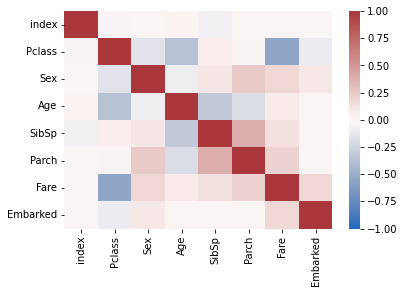

In [20]:
sns.heatmap(X.corr(), cmap="vlag", vmin=-1, vmax=1);

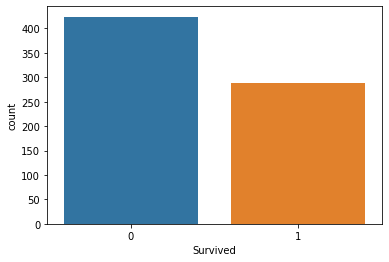

In [21]:
sns.countplot(y);

## Otimização de Hiperparâmetros
Nesse projeto, serão otimizados os seguintes hiperparâmetros: min_samples_leaf e max_depth

In [22]:
model = DecisionTreeClassifier()

In [23]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [24]:
espaco_hiperparametros ={
    'min_samples_leaf': randint(1, 11),
    'max_depth': randint(1, 11)
}

In [25]:
rand_search = RandomizedSearchCV(model, espaco_hiperparametros, cv=3, n_iter=40)

In [26]:
search = rand_search.fit(X_train, y_train)

In [27]:
print(rand_search.cv_results_['mean_test_score'].mean())

0.7784638554216867


In [28]:
rand_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 7}

## Treinando o Modelo Final e Fazendo as Previsões

In [29]:
best_max_depth = rand_search.best_params_['max_depth']
best_min_samples_leaf = rand_search.best_params_['min_samples_leaf']

In [30]:
final_model = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf)

In [31]:
final_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=7)

In [32]:
y_pred = final_model.predict(X_test)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       127
           1       0.82      0.71      0.76        87

    accuracy                           0.82       214
   macro avg       0.82      0.80      0.81       214
weighted avg       0.82      0.82      0.82       214

